# Feature Engineering
## Setup

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dotenv import load_dotenv
from pathlib import Path
import os

In [2]:
load_dotenv()  # Load environment variables from .env file
PARENT = Path(os.getcwd()).parent

DATA_DIR_PROCESSED = Path(os.getenv("DATA_DIR_PROCESSED"))
DATA_DIR_PROCESSED = PARENT / DATA_DIR_PROCESSED

In [9]:
df = pd.read_csv(DATA_DIR_PROCESSED / "1-loan_data_winsorized.csv")
df.head()

,credit_policy,purpose,interest_rate,installment,log_annual_income,debt_income_ratio,fico,days_with_credit_line,revolve_balance,revolve_utilized,inquiries_last_6_mon,delinquent_2_yrs,public_recs,default
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Features

In [10]:
# Income to installment ratio
df['income_installment_ratio'] = (df['log_annual_income'].apply(lambda x: np.exp(x))) / (df['installment']*12)

# Debt to credit ratio
df['debt_to_credit_ratio'] = df['revolve_balance'] / (df['log_annual_income'].apply(lambda x: np.exp(x)))

In [11]:
df.head()

,credit_policy,purpose,interest_rate,installment,log_annual_income,debt_income_ratio,fico,days_with_credit_line,revolve_balance,revolve_utilized,inquiries_last_6_mon,delinquent_2_yrs,public_recs,default,income_installment_ratio,debt_to_credit_ratio
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,8.543401,0.339459
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,23.734408,0.517277
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,7.268895,0.109719
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,43.632705,0.396082
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,65.422982,0.058663


### Check correlation of new features

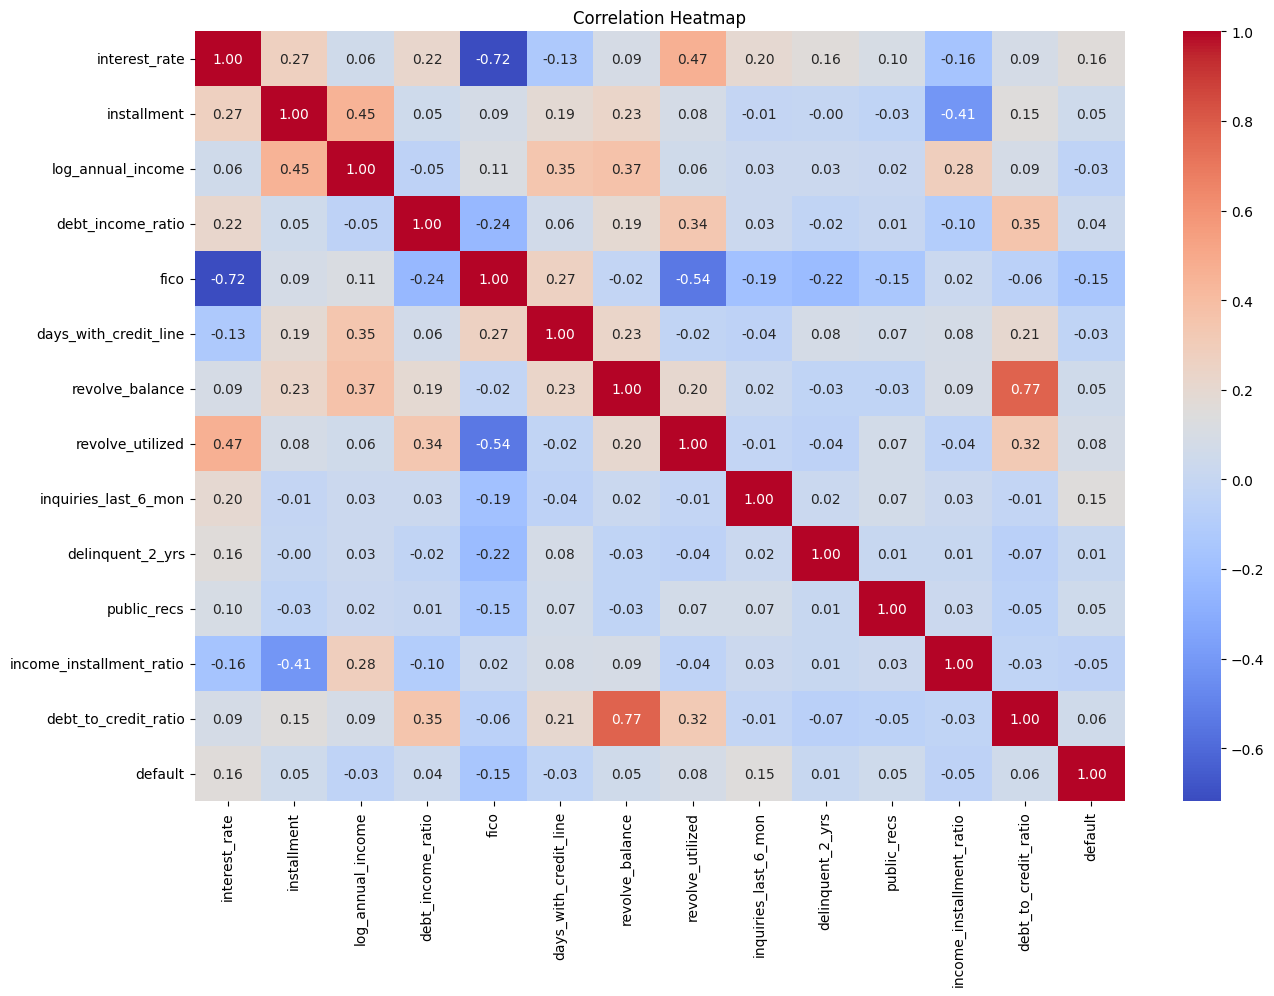

In [12]:
corr_cols = ['interest_rate', 'installment', 'log_annual_income', 'debt_income_ratio', 'fico', 'days_with_credit_line', 'revolve_balance', 'revolve_utilized', 'inquiries_last_6_mon', 'delinquent_2_yrs', 'public_recs', 'income_installment_ratio', 'debt_to_credit_ratio', 'default']

plt.figure(figsize=(15,10))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [13]:
df.to_csv(DATA_DIR_PROCESSED / "2-loan_data_feature_engineered.csv", index=False)